<a href="https://colab.research.google.com/github/Hectorsyj/prueba/blob/main/analisis_de_noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Actividad Clasificacion de las Noticias

---
Cargar el archivo Noticias.xlsx que contiene las noticias.
Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.
Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

In [1]:
pip install pandas numpy scikit-learn nltk gensim scipy openpyxl


#Ejercicio 1.

#Carga y Exploración de Datos

**Objetivo:** Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.  
**Acciones:**
* Cargar el archivo Noticias.xlsx que contiene las noticias.
* Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.
* Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar el archivo de datos
# file_path = '../../Datos/Datos Crudos/Noticias.xlsx'
file_path = 'Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


## Analisis exploratorio

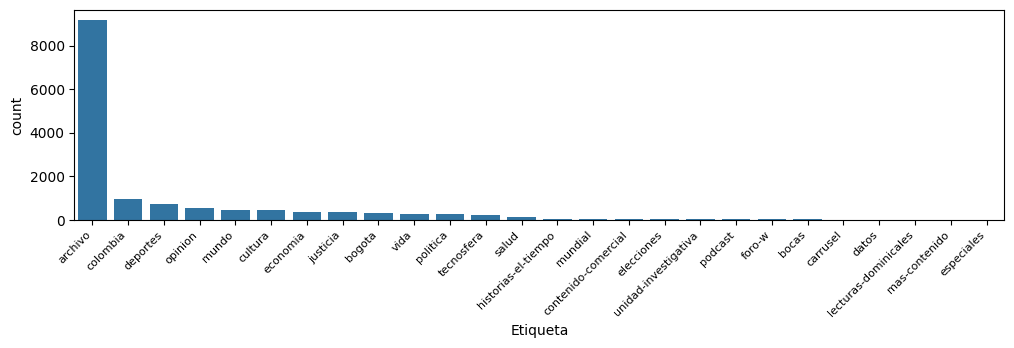

No tendremos en cuenta la etiqueta de archivo ya que esta no tiene significancia


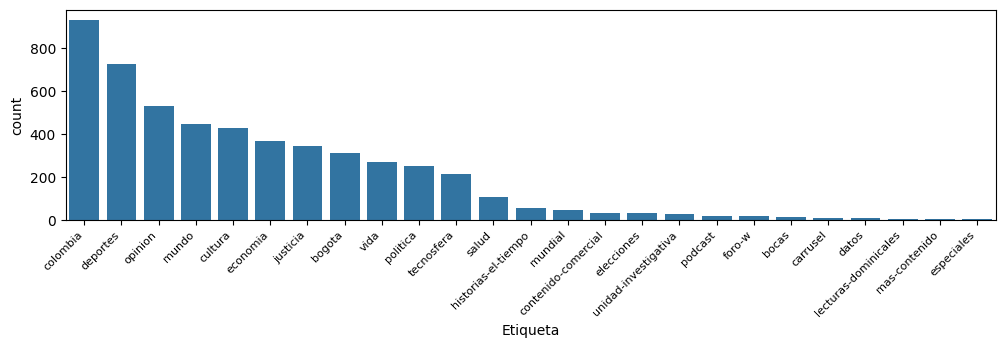

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
category_counts = data['Etiqueta'].value_counts().index.tolist()
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.countplot(x='Etiqueta', data=data, order=category_counts)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

print('No tendremos en cuenta la etiqueta de archivo ya que esta no tiene significancia')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
data1= data[data['Etiqueta'] != 'archivo']
category_counts = data1['Etiqueta'].value_counts().index.tolist()
sns.countplot(x='Etiqueta', data=data1, order=category_counts)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

#Ejercicio 2

#Filtrado de Datos

**Objetivo:** Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.  
**Acciones:**
* Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.
* Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

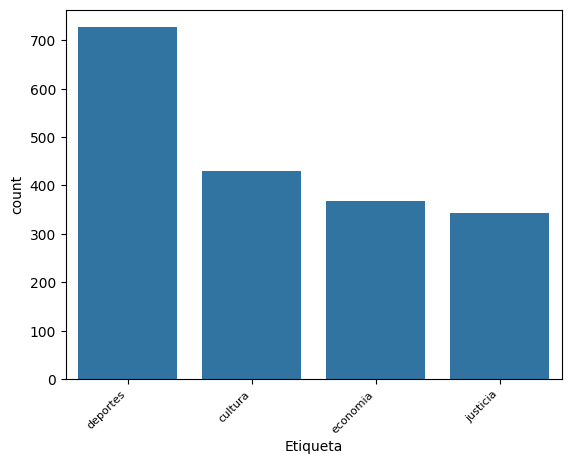

(1867, 6)

In [5]:
filt_etie = ['deportes', 'cultura', 'economia', 'justicia']
data2= data[data['Etiqueta'].isin(filt_etie)]

category_counts = data2['Etiqueta'].value_counts().index.tolist()
sns.countplot(x='Etiqueta', data=data2, order=category_counts)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()
data2.shape

**Analisis  de distrubucion igualitaria**

In [6]:
import numpy as np
distr_etiq = data2['Etiqueta'].value_counts()
tot_eti = np.sum(distr_etiq)
por_etiq = [numero / tot_eti for numero in distr_etiq]

def in_gini(df):
    gini = sum(x * (1 - x) for x in df)
    return gini
#evaluacion de la Proporcion

if  np.sum(por_etiq)== 1:
    print(f"El vector de proporcion suma {np.sum(por_etiq)} ,por lo que puede ser usado para calcular el indice de Gini\n")
    print(f"Para el caso del vector\n {por_etiq}\n se obtiene un Indice de gini {round(in_gini(por_etiq),3)}\n")
    x =0
    vect =[]
    for x in range(len(por_etiq)):
        vect.append(1/len(por_etiq))
        x= x+1
    print(f"Un indice optimo para estas {len(por_etiq)} etiquetas es de {round(in_gini(vect),3)}\n Por lo que comparativamente con la distribucion de las etiquetas escogidas el indice de gini no es muy distante, por lo que podemos usar este Dataframe filtrado para entrenal los modelos")


El vector de proporcion suma 1.0 ,por lo que puede ser usado para calcular el indice de Gini

Para el caso del vector
 [0.3893947509373326, 0.2303160149973219, 0.19657204070701662, 0.18371719335832887]
 se obtiene un Indice de gini 0.723

Un indice optimo para estas 4 etiquetas es de 0.75
 Por lo que comparativamente con la distribucion de las etiquetas escogidas el indice de gini no es muy distante, por lo que podemos usar este Dataframe filtrado para entrenal los modelos


# Ejercicio 3

#Preprocesamiento de Texto

**Objetivo:** Preparar los datos textuales para el entrenamiento del modelo.  
**Acciones:**
* Convertir todo el texto a minúsculas para uniformidad.
* Eliminar puntuación y números para reducir el ruido en los datos.
* Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.
* Tokenizar el texto, es decir, dividir el texto en palabras individuales.
* Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

In [7]:
# Función para preprocesar texto
def preprocess_text(text):
        # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data2 = data2.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data2['contenido_preprocesado'] = data2['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data2[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')



,contenido,contenido_preprocesado
10487,Citas: “Los crímenes de violencia sexual comet...,citas “los crímenes de violencia sexual cometi...
10488,Con motivo de la celebración de los 20 años de...,con motivo de la celebración de los años de l...
10489,"El cuadro Busto de mujer, del artista español ...",el cuadro busto de mujer del artista español p...
10490,"El Carnaval de las Artes, organizado en Barran...",el carnaval de las artes organizado en barranq...
10491,"Louise du Toit, filósofa; el doctor Denis Mukw...",louise du toit filósofa el doctor denis mukweg...


Dimensiones de los datos: (14396, 6)


In [8]:
!pip install tensorflow
!pip install keras_nlp
!pip uninstall tf-keras
!pip install "keras_nlp[tensorflow]<0.17"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.2/691.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
Found existing installation: tf_keras 2.17.0
Uninstalling tf_

In [9]:
# vamos a contar las palabras de las diferentes noticias

conteo = data2['contenido_preprocesado'].str.split().apply(len)
conteo.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

,contenido_preprocesado
count,1866.000000
mean,602.788317
std,443.489502
min,90.000000
25%,326.000000
50%,485.500000
75%,734.000000
90%,1120.000000
99%,2047.100000
max,5773.000000


In [10]:
# Tokenizar el texto

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data2['contenido_preprocesado'])
sequences = tokenizer.texts_to_sequences(data2['contenido_preprocesado'])
word_index = tokenizer.word_index
max_len = 1000
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]

## También puede usar las técnicas de preprocesamiento de texto y de embedding que hicimos anteriormente




array([[ 5239,  1436,  2723, ...,     0,     0,     0],
       [  132,  5526,  1078, ...,    78,    27,    67],
       [    4,  1503, 16354, ...,     0,     0,     0],
       [    4,  8045,     1, ...,     0,     0,     0],
       [13747,  8720, 20459, ...,     0,     0,     0]], dtype=int32)

# Ejercicio 4

# División del Conjunto de Datos

Objetivo: Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.  
Acciones:
* Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.
* Asegurarse de que la división sea aleatoria, pero que mantenga una proporción similar de las categorías en ambos conjuntos.

In [11]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
data2.loc[:,'Etiqueta_codificada'] = label_encoder.fit_transform(data2['Etiqueta'])

# División del conjunto de datos
X_train2, X_val, y_train2, y_val = train_test_split(padded_sequences, data2['Etiqueta_codificada'], test_size=0.2, random_state=42,stratify=data2['Etiqueta_codificada'])

# Mostrar tamaño de los conjuntos de datos
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train2, y_train2)

len(X_train), len(X_val)


(2324, 374)

#Ejercicio 5

## Implementación de un Modelo RNN

Objetivo: Construir y entrenar un modelo RNN para clasificar las noticias.  
Acciones:
* Definir la arquitectura del modelo RNN, incluyendo capas de embedding y capas recurrentes.
* Configurar los hiperparámetros del modelo, como el tamaño del embedding y el número de unidades recurrentes.
* Entrenar el modelo utilizando el conjunto de datos de entrenamiento y evaluar su rendimiento en el conjunto de validación.

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.2695 - loss: 1.3757 - val_accuracy: 0.4465 - val_loss: 1.3289
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.3216 - loss: 1.3547 - val_accuracy: 0.3209 - val_loss: 1.3540
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.3894 - loss: 1.3098 - val_accuracy: 0.4251 - val_loss: 1.3484
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3332 - loss: 1.3469 - val_accuracy: 0.4358 - val_loss: 1.3409
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.3853 - loss: 1.2973 - val_accuracy: 0.4091 - val_loss: 1.3353
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3909 - loss: 1.2823 - val_accuracy: 0.2727 - val_loss: 1.3541
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.3833 - loss: 1.2979 - val_accuracy: 0.2674 - val_loss: 1.3589
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.4860 - loss: 1.2096 - val_accuracy: 0.3476 - val

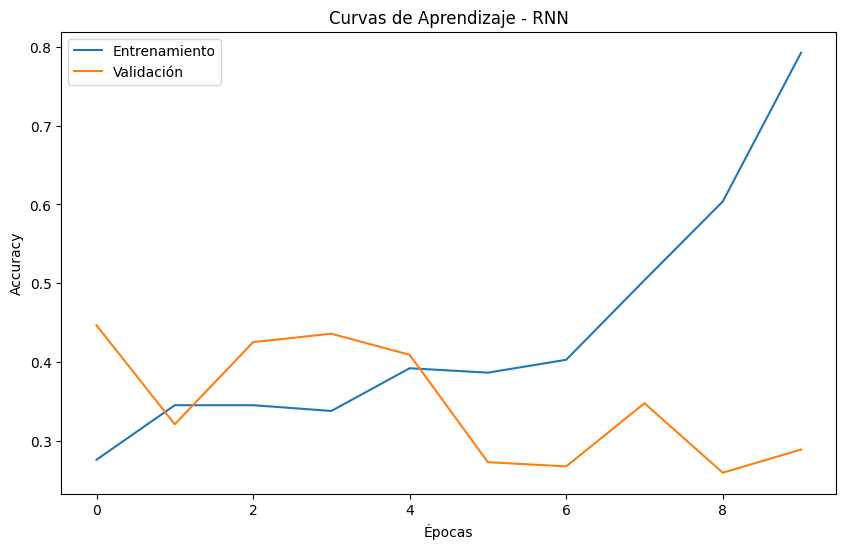

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from tensorflow import keras
from keras.layers import Dropout

# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=528, input_length=max_len))
#model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Dense(units=len(filt_etie), activation='softmax'))


# Compilación del modelo

#model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# funcion perdida, sparse entre 0s y 1 s

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()


In [14]:
# Validemos el modelo con la base de testeo

loss, accuracy = model_rnn.evaluate(X_val, y_val, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

### Calculemos la matriz de confusión
y_pred = model_rnn.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix

#confusion_matrix(np.argmax(y_val, axis=0), y_pred_classes)
print(confusion_matrix(y_val, y_pred_classes))

## Veamos el reporte

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_classes))

Test Loss: 1.4418
Test Accuracy: 0.2888
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 477ms/step
[[27 12 25 22]
 [54 38 33 21]
 [19 14 29 11]
 [17 17 21 14]]
              precision    recall  f1-score   support

           0       0.23      0.31      0.27        86
           1       0.47      0.26      0.33       146
           2       0.27      0.40      0.32        73
           3       0.21      0.20      0.20        69

    accuracy                           0.29       374
   macro avg       0.29      0.29      0.28       374
weighted avg       0.33      0.29      0.29       374



In [25]:
import tensorflow as tf
dicc={'deportes':0,'cultura':1,'economia':2,'justicia':3}

y_prueba_2=[dicc[tema] for tema in data2['Etiqueta']]

y_prueba=tf.keras.utils.to_categorical(y_prueba_2, num_classes=4)


In [30]:
# División del conjunto de datos
X_entre2, X_eva, y_entre2, y_eva = train_test_split(padded_sequences, y_prueba, test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
X_entre, y_entre = ros.fit_resample(X_entre2, y_entre2)
print(X_entre.shape, y_entre.shape)

(2352, 1000) (2352, 4)


## Ejercicio 6: Construcción y Entrenamiento de Modelos LSTM

**Objetivo:** Implementar un modelo de Red Neuronal LSTM (Long Short-Term Memory) para clasificar noticias en las categorías especializadas.
**Acciones:**
* Construir un modelo LSTM utilizando capas de Embedding, LSTM y Dense.
* Compilar el modelo con una función de pérdida adecuada y un optimizador.
* Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
* Evaluar el rendimiento del modelo en términos de precisión y pérdida.

In [34]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.utils import to_categorical

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=528, input_length=max_len))
model_lstm.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model_lstm.add(Bidirectional(LSTM(units=32)))
model_lstm.add(Dense(units=len(filt_etie), activation='softmax'))

# Compilación del modelo
model_lstm.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_entre, y_entre, validation_data=(X_eva, y_eva), epochs=8, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()


Epoch 1/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 462s 6s/step - accuracy: 0.2817 - loss: 1.3786 - val_accuracy: 0.4813 - val_loss: 1.3491
Epoch 2/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 501s 6s/step - accuracy: 0.5227 - loss: 1.2826 - val_accuracy: 0.5989 - val_loss: 0.9362
Epoch 3/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 506s 6s/step - accuracy: 0.6745 - loss: 0.8667 - val_accuracy: 0.7353 - val_loss: 0.7792
Epoch 4/8
58/74 ━━━━━━━━━━━━━━━━━━━━ 1:38 6s/step - accuracy: 0.8995 - loss: 0.6053

KeyboardInterrupt: 

#Ejercicio 7

##Comparación de Resultados

**Objetivo:** Evaluar y comparar el rendimiento de los modelos RNN y LSTM.
**Acciones:**
* Calcular y comparar métricas de rendimiento como precisión, recall y F1-score para ambos modelos.
* Visualizar las curvas de aprendizaje y los resultados de validación para entender mejor cómo se desempeñan los modelos en las tareas de clasificación.
* Comparar los modelos permite entender las fortalezas y debilidades de cada enfoque, proporcionando información valiosa para elegir el modelo más adecuado para tareas específicas de clasificación de texto. Documentar estos resultados de forma asertiva en el cuaderno y en el informe.